In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.cm import get_cmap
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap
import numpy as np
warnings.filterwarnings('ignore')

In [13]:
big_df = pd.read_csv("transformed_time.csv")
df = big_df[["method", "raw_seconds"]]
df.head()

,method,raw_seconds
0,mogonet,10.3
1,diablo,14.3
2,mogonet,10.6
3,cooperative_learning,14.0
4,cooperative_learning,14.2


In [78]:
df.query('method == "cooperative_learning"').raw_seconds.mean()

245.79761904761904

In [72]:
def plot_duration(df, width=0.5, fontsize=14):
    sns.set(style="whitegrid", context="notebook", rc={"axes.edgecolor": "black"})
    colors = sns.color_palette("tab10").as_hex()
    palette = {
        'diablo': colors[0],
        'cooperative_learning': colors[1],
        'mogonet': colors[2],
    }
    # Sort unique method names alphabetically
    sorted_methods = sorted(df['method'].unique())
    # Creating a boxplot using Seaborn with custom colors and sorted methods
    plt.figure(figsize=(6, 8))
    ax = sns.boxplot(x='method', y='raw_seconds', data=df, 
                     order=sorted_methods, palette=palette,
                     medianprops={'color': 'white',
                                 'linewidth': 2.5},
                     flierprops={'marker': 'o', 
                                 'markerfacecolor': 'red', 
                                 'markeredgecolor': 'black'},
                    width=width)
    plt.xlabel('Method', fontsize=fontsize+2)
    plt.ylabel('Computation duration (seconds) in Log10 scale', fontsize=fontsize+2)
    #plt.title('Boxplot of Raw Seconds for Each Method')
    plt.grid(True)
    # Add sizes
    # Adjust tick label font size
    plt.xticks(fontsize=fontsize)  # Adjust font size here
    plt.yticks(fontsize=fontsize)  # Adjust font size here
    # Scaling y-axis after log10 transformation
    ax.set(yscale="log")
    # Then save it to figure
    plt.savefig("comp_time.png")
    plt.show()

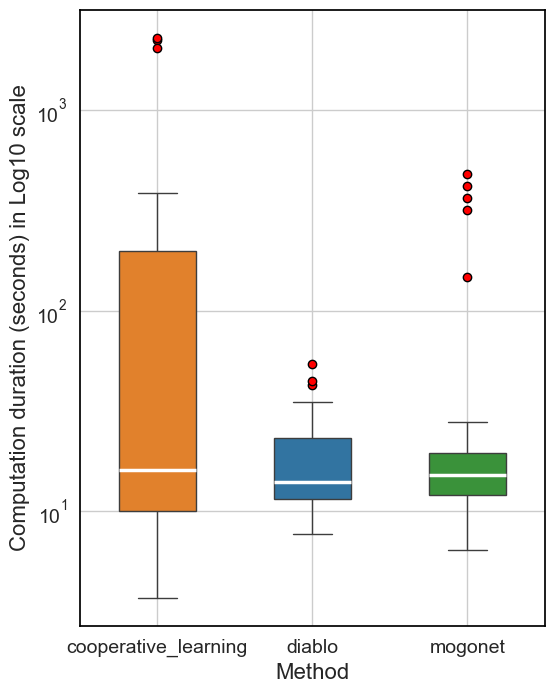

In [73]:
plot_duration(df)